# Modeling & Evaluation

- [Topic Modeling](#topic_modeling)
- [Time Series Forecasting](#time_series_forecasting)
- [TEST: XGBoost](#xgboost)

In [1]:
%load_ext autoreload
%autoreload 2

---

## Topic Modeling <a name="topic_modeling"></a>

### Modeling

#### *A*. Modeling

Der nachfolgende Code führt das gesamte LDA Topic Modeling durch, indem es eigens optimierte vordefinierte Klassen zur Berechnung importiert. Es wird empfohlen diese Methode zur Erstellung der Modelle zu verwenden. Es besteht jedoch nachfolgend auch die Möglichkeit, die wichtigsten Schritte zur Berechnung des Models eigenständig Schritt für Schritt durchzuführen.

In [1]:
from src.models import topic_modeling as tm
from src.utils import safe_as_pkl
import pandas as pd

# load dataframe
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

# create & build lda model
lda_model = tm.LdaModel(text=df['preprocessed_text'])
lda_model.build(num_topics=8)

# export
safe_as_pkl(lda_model, path='../models/lda_model.pkl')

#### 0. Datensatz laden

In [14]:
%%script false
import pandas as pd
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

Couldn't find program: 'false'


#### 1. Erstellen eines Wörterbuchs

Ein Wörterbuch ist wichtig für das LDA-Modell, da es das Modell trainiert, die Sprache und den Kontext der Dokumente zu verstehen. Es enthält alle eindeutigen Wörter, die in den Dokumenten vorkommen, und ordnet jedem Wort eine eindeutige Nummer zu. Das Wörterbuch wird verwendet, um jedes Dokument in eine Vektordarstellung umzuwandeln, die das Modell verwenden kann.

In [15]:
%%script false
from gensim import corpora
dictionary = corpora.Dictionary(df['preprocessed_text'])

Couldn't find program: 'false'


#### 2. Erstellen eines Corpus

Ein Corpus ist notwendig, um jedes Dokument in eine Vektordarstellung umzuwandeln, die vom LDA-Modell verarbeitet werden kann. Ein Corpus ist eine Sammlung von Dokumenten, die in eine Matrix umgewandelt wird, wobei jede Zeile für ein Dokument und jede Spalte für ein Wort im Wörterbuch steht. Die Matrix enthält die Anzahl der Vorkommen jedes Wortes in jedem Dokument. Durch die Umwandlung jedes Dokuments in eine Vektordarstellung kann das LDA-Modell jedes Dokument analysieren und Themen identifizieren, die in jedem Dokument vorkommen. Ohne diese Vektordarstellung könnte das Modell die Dokumente nicht analysieren und Themen identifizieren.

In [16]:
%%script false
corpus = [dictionary.doc2bow(text) for text in df['preprocessed_text']]

Couldn't find program: 'false'


#### 3. Erstellen eines LDA-Modells

In [17]:
%%script false
from gensim import models
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

Couldn't find program: 'false'


#### *B*. Ergebnisse visualisieren

In [7]:
import pyLDAvis.gensim_models
from src.utils import load_pkl

lda_model = load_pkl('../models/lda_model.pkl')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model.model, lda_model.corpus, lda_model.dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.162041  0.144131       1        1  30.795186
4     -0.060638 -0.009188       2        1  23.105092
3     -0.164075  0.080613       3        1  22.246902
0      0.029021 -0.344181       4        1  16.752006
2      0.357732  0.128624       5        1   7.100814, topic_info=              Term           Freq          Total Category  logprob  loglift
53              ai   81781.000000   81781.000000  Default  30.0000  30.0000
853  cybersecurity   42737.000000   42737.000000  Default  29.0000  29.0000
95        technews   76808.000000   76808.000000  Default  28.0000  28.0000
50            tech  419510.000000  419510.000000  Default  27.0000  27.0000
34      innovation  215603.000000  215603.000000  Default  26.0000  26.0000
..             ...            ...            ...      ...      ...      ...
76            news    7455.672363   80244.791212   Topic5  -4.9087   0.2689
463       software    5893.605068   49293.767030   Topic5  -5.1438   0.5210
114            via    4424.798722   45740.486712   Topic5  -5.4305   0.3092
572        digital    4290.351266   40634.706645   Topic5  -5.4613   0.3967
19        business    4124.262475   78512.392155   Topic5  -5.5008  -0.3014

[321 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2110      2  0.000256             --
2110      3  0.999609             --
868       2  0.978208  100daysofcode
868       4  0.021781  100daysofcode
235       2  0.999945             5g
...     ...       ...            ...
634       4  0.000596          would
1068      1  0.221831           year
1068      2  0.067301           year
1068      3  0.701461           year
1068      4  0.009400           year

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])

### Evaluation

#### 1. Coherence Score berechnen

Der Coherence Score ist ein Evaluationsmaß für Topic Models, das versucht, die Kohärenz der gefundenen Themen zu bewerten. Die Kohärenz bezieht sich darauf, wie gut die Wörter innerhalb eines Themas zusammenpassen und ob sie eine sinnvolle Bedeutung ergeben. Ein hohes Maß an Kohärenz zeigt an, dass die Themen gut definiert und interpretierbar sind.

In [ ]:
from src.models import topic_modeling as tm
from src.utils import load_pkl

lda_model = load_pkl('../models/lda_model.pkl')
coherence_score = tm.evaluate(model=lda_model.model, text=lda_model.text, dictionary=lda_model.dictionary)

#### 2. Hyperparameter Tuning durchführen

Hyperparameter Tuning ist ein wichtiger Schritt im Machine Learning, der dazu beiträgt, das bestmögliche Modell zu finden. In diesem Fall wird das bestmögliche Modell anhand des Coherence Scores bemessen. Ziel des Hyperparameter Tuning ist es demnach, das Modell mit dem höchsten Coherence Score zu finden. Hyperparameter sind Parameter, die das Verhalten des Modells beeinflussen, aber nicht direkt von den Daten gelernt werden. Sie müssen vom Anwender festgelegt werden und können eine erhebliche Auswirkung auf die Leistung des Modells haben. Folgende Parameter sollen optimiert werden:

- num_topics
- alpha
- eta
- passes

**Anforderungen**

Um die nachfolgenden Berechnungen erfolgreich durchführen zu können, muss der Rechner Leistungsanforderungen erfüllen. Die Berechnungen wurden auf einem virtuellen Server mit folgenden Spezifikationen durchgeführt:

- Virtualisierungstechnik: KVM
- Prozessor: 18 vCores
- RAM: 48GB DDR4 ECC

**Random Search**

Um nun eine ausreichend gute Kombination der Hyperparameter zu ermitteln, wird zunächst ein Random-Search Algorithmus ausgeführt. Dieser wählt eine zufällige Kombination an Parametern aus und berechnet für diese den Coherence Score. Ziel des Algorithmus ist es, eine ausreichend gute Menge an Modellen berechnet zu haben, sodass anschließend eine Einschränkung der möglichen Paramenter-Kombinationen vorgenommen werden kann.

*Wertebereiche für Hyperparameter festlegen*

In [9]:
num_topics = [i for i in range(4, 74)]
alpha = ['symmetric', 'asymmetric'] + [round(i*0.1, 1) for i in range(1, 10)]
eta = ['symmetric', 'auto'] + [round(i*0.1, 1) for i in range(1, 10)]
passes = [i for i in range(1, 2)]

In [10]:
import itertools

combinations = list(itertools.product(num_topics, alpha, eta, passes))
list_parameter_combinations = [{'num_topics': item[0], 'alpha': item[1], 'eta': item[2], 'passes': item[3]} for item in combinations]

*Random Search Algorithmus ausführen*

*Hinweis: Aufgrund einer möglichst langen Laufzeit des Random-Search Algorithmus wird empfohlen das Skript hyperparameter_tuning_headless.py extern auf einem Server auszuführen.*

In [1]:
%%script false
from src.models import tm_hyperparameter_tuning as ht
import pandas as pd

df = ht.random_search('../data/processed/twitter_tweets_processed.feather', list_parameter_combinations, multicore=True)
df.to_feather('../data/modeling/tm_ht_results_randomsearch.feather')

Couldn't find program: 'false'


*Ergebnisse laden und auswerten*

In [10]:
import pandas as pd
df = pd.read_feather('../data/modeling/tm_ht_results_randomsearch.feather')
df.sort_values('coherence_score', ascending=False, inplace=True)
df = df.head(50)
df[['num_topics', 'eta', 'passes']] = df[['num_topics', 'eta', 'passes']].astype(float)
mean_values = df[['num_topics', 'eta', 'passes']].mean()
print(df)
print(mean_values)

            seed  num_topics       alpha  eta  passes     coherence_score
667   1686152042        11.0  asymmetric  0.5     9.0  0.5818809257163331
929   1686152042        17.0         0.1  0.7     9.0  0.5763077288087152
1068  1686152042        16.0         0.2  0.9     6.0  0.5703944180071809
941   1686152042        17.0   symmetric  0.9    10.0  0.5614698563855085
885   1686152042        12.0         0.3  0.9     9.0  0.5509165701548283
646   1686152042        19.0   symmetric  0.7    10.0  0.5418351303171569
758   1686152042        28.0         0.2  0.5    10.0   0.540073611959002
839   1686152042        20.0   symmetric  0.5    10.0  0.5331101082579478
1031  1686152042        14.0         0.4  0.9     6.0  0.5320846575571175
1142  1686152042        22.0         0.3  0.9     9.0  0.5315428790294124
830   1686152042        12.0         0.1  0.7    10.0  0.5308423229477817
947   1686152042        16.0         0.2  0.7     4.0  0.5301907611530463
672   1686152042        28.0  asymmetr

## **Grid Search**

Nachdem der Random-Search Algorithmus durchgeführt wurde, lassen sich die Wertebereiche der Hyperparameter weiter eingrenzen. Mithilfe des Grid-Search Algorithmus werden dann alle Kombinationen von Hyperparametern berechnet.

*Wertebereich für Hyperparameter einschränken*

In [22]:
num_topics = [i for i in range(13, 24)]
alpha = ['symmetric', 'asymmetric'] + [0.1, 0.2, 0.3]
eta = [0.5, 0.6, 0.7, 0.9]
passes = [i for i in range(10, 13)]

In [23]:
import itertools

combinations = list(itertools.product(num_topics, alpha, eta, passes))
list_parameter_combinations = [{'num_topics': item[0], 'alpha': item[1], 'eta': item[2], 'passes': item[3]} for item in combinations]

*Grid Search Algorithmus ausführen*

Hinweis: Da die Wahrscheinlichkeit einer langen Laufzeit hoch ist, wird auch an dieser Stelle empfohlen stattdessen das Skript hyperparameter_tuning_headless.py extern auf einem Server auszuführen.

In [2]:
%%script false
from src.models import tm_hyperparameter_tuning as ht
import pandas as pd

df = ht.grid_search('../data/processed/twitter_tweets_processed.feather', list_parameter_combinations, multicore=True)
df.to_feather('../data/modeling/tm_ht_results_gridsearch.feather')

Couldn't find program: 'false'


*Ergebnisse laden und auswerten*

In [1]:
import pandas as pd
df = pd.read_feather('../data/modeling/tm_ht_results_gridsearch.feather')
df.sort_values('coherence_score', ascending=False, inplace=True)
df.head(10)

,seed,num_topics,alpha,eta,passes,coherence_score
76,1686734536,14,asymmetric,0.6,11,0.559431111599822
20,1686734536,13,asymmetric,0.7,12,0.5586230959104673
79,1686734536,14,asymmetric,0.7,11,0.5533927277435006
18,1686734536,13,asymmetric,0.7,10,0.5455044530738319
321,1686734536,18,asymmetric,0.9,10,0.5416740817585003
222,1686734536,16,0.2,0.7,10,0.5349232229089451
137,1686734536,15,asymmetric,0.6,12,0.5345805752045308
227,1686734536,16,0.2,0.9,12,0.5320154423312355
17,1686734536,13,asymmetric,0.6,12,0.5319750931558909
134,1686734536,15,asymmetric,0.5,12,0.5301824463275643


#### 3. Erstellen optimiertes LDA-Modell 

Nach der Ausführung des Hyperparameter-Tunings, kann eine optimale Auswahl von Hyperparametern getroffen werden. Mithilfe der optimierten Parameter kann im folgenden das optimierte LDA-Modell erstellt und berechnet werden.

In [3]:
from src.models import topic_modeling as tm
from src.utils import safe_as_pkl
import pandas as pd

# load dataframe
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

# create & build optimized lda model
lda_model = tm.LdaMulticoreModel(text=df['preprocessed_text'])
lda_model.build(
    seed=1686734536, 
    num_topics=18, 
    alpha='asymmetric', 
    eta=0.9, 
    passes=10)

# export
safe_as_pkl(lda_model, path='../models/optimized_lda_model_18_asym_09_10_0541.pkl')

2023-06-23 08:39:52,144 - INFO - Initialize model; create dictionary and corpus...
2023-06-23 08:40:20,700 - INFO - enable multiprocessing...
2023-06-23 08:40:25,660 - INFO - calculate lda model...
2023-06-23 09:06:01,115 - INFO - Done. Model calculated successfully! Calculation time: 12823.7519 minutes


In [3]:
import pyLDAvis.gensim_models
from src.utils import load_pkl

# load optimized lda model
lda_model = load_pkl('../models/optimized_lda_model_28_02_05_10_0540.pkl')

# visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model.model, lda_model.corpus, lda_model.dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.359005 -0.069102       1        1  15.254385
10     0.295402 -0.027235       2        1   9.848811
13     0.220642 -0.042880       3        1   7.046354
23     0.238679  0.134490       4        1   6.607994
12     0.168618 -0.128978       5        1   5.934088
3      0.147388  0.105906       6        1   5.471969
7      0.142189 -0.192878       7        1   4.861159
9      0.090795  0.174488       8        1   4.661304
27     0.083412 -0.071993       9        1   4.353654
4      0.030181  0.200575      10        1   4.154716
26     0.027830  0.065974      11        1   3.313267
0      0.011877  0.007760      12        1   3.238112
17     0.027930  0.020940      13        1   3.177776
8     -0.051666  0.048823      14        1   2.906171
24    -0.085290 -0.038240      15        1   2.063673
11    -0.108011 -0.014139      16        1   1.811132
19    -0.126846 -0.011987      17        1   1.489357
21    -0.131615 -0.016657      18        1   1.412450
22    -0.129471 -0.021900      19        1   1.394705
6     -0.129944 -0.014617      20        1   1.362562
16    -0.132949 -0.007809      21        1   1.323484
25    -0.136065 -0.017720      22        1   1.261401
14    -0.128766 -0.013259      23        1   1.212561
20    -0.135764 -0.013515      24        1   1.201232
1     -0.136602 -0.013929      25        1   1.196084
5     -0.137729 -0.013355      26        1   1.183079
18    -0.135436 -0.015362      27        1   1.152586
15    -0.137792 -0.013398      28        1   1.105934, topic_info=             Term           Freq          Total Category  logprob  loglift
34     innovation  165143.000000  165143.000000  Default  30.0000  30.0000
50           tech  301944.000000  301944.000000  Default  29.0000  29.0000
53             ai   75690.000000   75690.000000  Default  28.0000  28.0000
15     technology  366781.000000  366781.000000  Default  27.0000  27.0000
95       technews   48715.000000   48715.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
10194    thompson     133.205249     143.742061  Topic28  -7.0741   4.4284
2320     accident     198.372299     229.574152  Topic28  -6.6758   4.3584
13862    briefing     147.092283     184.766629  Topic28  -6.9749   4.2764
25636      ignite     147.609346     199.249023  Topic28  -6.9714   4.2045
17982          /?     169.985174     727.918979  Topic28  -6.8302   3.0500

[1392 rows x 6 columns], token_table=       Topic      Freq Term
term                       
1432       2  0.000664  !!!
1432       3  0.170714  !!!
1432       5  0.039855  !!!
1432       6  0.000664  !!!
1432       7  0.003321  !!!
...      ...       ...  ...
8573      24  0.001161   …"
6389      18  0.994173   ⁦⁩
3631      18  0.985832   ️⃣
81725     13  0.005959   🇺🇦
81725     28  0.941458   🇺🇦

[3738 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 14, 24, 13, 4, 8, 10, 28, 5, 27, 1, 18, 9, 25, 12, 20, 22, 23, 7, 17, 26, 15, 21, 2, 6, 19, 16])

---

## Time Series Forecasting <a name="time_series_forecasting"></a>

### Modeling

#### 1. Vorbereitung

*Tweets den Topics zuweisen*

Der Parameter `minimum_probability` in der Methode `get_document_topics` legt die Mindestwahrscheinlichkeit fest, wie ab der ein Topic in den Ergebnissen berücksichtigt wird. Beispiel: Angenommen, ein Dokument wird mit den Topics A, B und C assoziiert, wobei die Wahrscheinlichkeiten wie folgt sind: A (0.8), B (0.3) und C (0.1). Wenn minimum_probability auf 0.5 gesetzt wird, werden nur Topic A und B in den Ergebnissen enthalten sein, da sie eine Wahrscheinlichkeit von 0.5 oder höher haben. Topic C wird nicht berücksichtigt, da seine Wahrscheinlichkeit niedriger als 0.5 ist.

In [2]:
# %%script false
from src.utils import load_pkl
import pandas as pd
from tqdm import tqdm

lda_model = load_pkl('../models/optimized_lda_model_17_01_07_9_0576.pkl')

# iterate over each document in the corpus and assign it the most likely topic
topics = []
for doc in tqdm(lda_model.corpus, total=len(lda_model.corpus)):
    doc_topics = lda_model.model.get_document_topics(doc, minimum_probability=0.4)  # select minimum probability here!
    # check if a topic was found with sufficient probability (minimum_probability)
    if doc_topics:
        doc_topics = [int(_[0]) for _ in doc_topics] # transform to list of topics
    else:
        doc_topics = None
    topics.append(doc_topics)
    
# load dataframe and add results 
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')
df['topics'] = topics
df.to_feather('../data/modeling/topic_assigned_twitter_tweets.feather')

100%|████████████████████████████████████████████████████████████████████████| 851926/851926 [03:46<00:00, 3753.31it/s]


*Datensätze transformieren*

In [48]:
# limit the topics for which arima models are to be calculated
list_of_topics = [2, 4, 5]

# label the topics
topic_label = {
    2: 'Cybersecurity',
    4: 'Jobs',
    5: 'AI'
}

In [49]:
import pandas as pd
from src.utils import logger
from src.models.arima import ArimaModel

df = pd.read_feather('../data/modeling/topic_assigned_twitter_tweets.feather')

logger.info(f"{df['topics'].isnull().sum()} tweets could not be assigned to a topic! -> Drop...")
df.dropna(inplace=True)

# explode on the "topics" column to convert each combination of values into separate rows
df = df.explode('topics')
df.rename(columns={'topics': 'topic'}, inplace=True)

# remove unwanted topics from the DataFrame
df = df.loc[df['topic'].isin([i - 1 for i in list_of_topics])]

# resample the df to daily frequency, grouping by 'topics' and counting occurrences
df = df.groupby('topic').resample('1D', on='date').size().rename('count').reset_index().set_index('date')

# group the DataFrame by 'topics'
df_groupby_topic = df.groupby('topic')

# create an Arima object for each topic and save it in a list
list_arima_models = []
for topic, df in df_groupby_topic:
    df.drop('topic', axis=1, inplace=True)

    arima_model = ArimaModel()
    arima_model.topic_id = topic + 1
    arima_model.label = topic_label[topic + 1]
    arima_model.data = df
    
    list_arima_models.append(arima_model)

2023-06-23 16:12:54,581 - INFO - 36659 tweets could not be assigned to a topic! -> Drop...


#### 2. Data Exploration

Cybersecurity


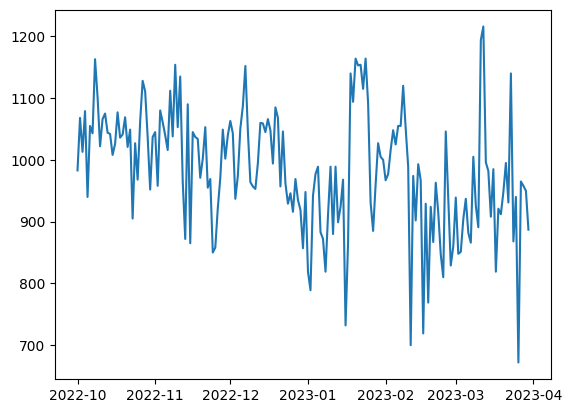

Jobs


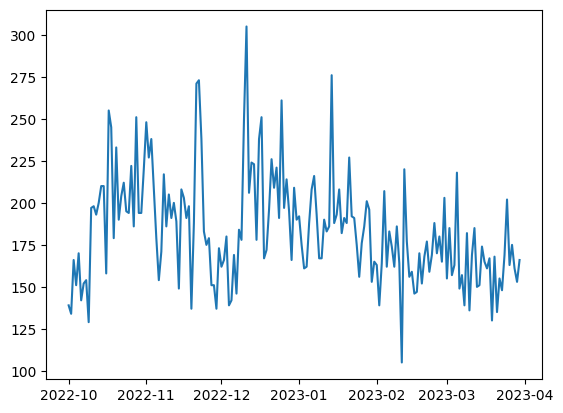

AI


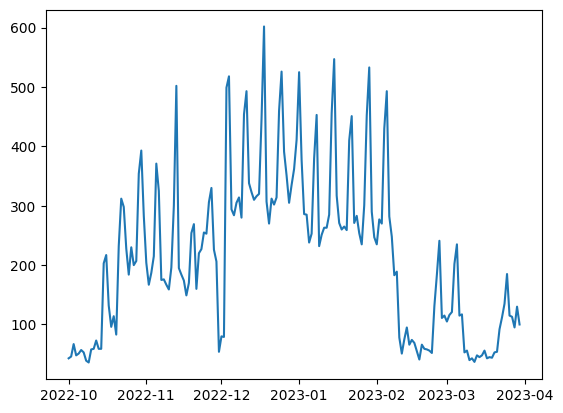

In [50]:
import matplotlib.pyplot as plt

for arima_model in list_arima_models:
    print(arima_model.label)
    plt.plot(arima_model.data)
    plt.show()

#### 3. Modeling

*Überprüfe auf Stationary-Time-Series*

In Bezug auf Zeitreihenmodelle bedeutet "stationary" oder "stationär", dass die statistischen Eigenschaften einer Zeitreihe über die Zeit hinweg konstant bleiben. Das bedeutet, dass sich der Mittelwert, die Varianz und die Autokorrelation der Daten nicht systematisch mit der Zeit ändern. ARIMA-Modelle basieren auf der Annahme, dass die Zeitreihen stationär sind.

Um zu überprüfen, ob die Zeitreihen stationär sind, wird der Augmented Dickey-Fuller (ADF) Test durchgeführt. Der ADF-Test testet die Nullhypothese, dass die Zeitreihe eine Einheitswurzel (nicht stationär) hat. Wenn der p-Wert des Tests unter einem bestimmten Signifikanzniveau liegt (z. B. 0,05), kann die Nullhypothese verworfen werden und auf Stationarität geschlossen werden.

In [51]:
from statsmodels.tsa.stattools import adfuller
    
for arima_model in list_arima_models:
    adf_test_result = adfuller(arima_model.data['count'])
    if adf_test_result[1] <= 0.05:
        arima_model.stationary = {'isStationary': True, 'p-value': adf_test_result[1]}
    else:
        arima_model.stationary = {'isStationary': False, 'p-value': adf_test_result[1]}
        logger.warning(f'Topic {arima_model.topic_id} ({arima_model.label}) is not stationary!')

2023-06-23 16:13:15,044 - WARNING - Topic 5 (AI) is not stationary!


*Umwandeln von Nicht-Stationären Zeitreihen in Stationäre*

In [52]:
import numpy as np

for arima_model in list_arima_models:
    if arima_model.stationary['isStationary'] == False:
        arima_model.data['count'] = arima_model.data['count'].diff().fillna(0)
        adf_test_result = adfuller(arima_model.data['count'])
        if adf_test_result[1] <= 0.05:
            arima_model.stationary = {'isStationary': True, 'p-value': adf_test_result[1]}
        else:
            logger.error(f'Topic {arima_model.topic_id} ({arima_model.label}) could not be made stationary. Try another method!')

*Erstellung von Trainings-Trainings- und Testdatensätzen*

Der Trainingsdatensatz wird verwendet, um das ARIMA-Modell zu trainieren. Indem das Modell auf den Trainingsdaten angepasst wird, erlernt es die Muster, Trends und Abhängigkeiten in den Daten.  Der Testdatensatz wird später verwendet, um die Vorhersageleistung des Modells zu bewerten. Da der Testdatensatz Daten enthält, die das Modell während des Trainings nicht gesehen hat, ermöglicht er eine unabhängige Bewertung der Modellgenauigkeit.

In [53]:
for arima_model in list_arima_models:
    split = int(0.9 * len(arima_model.data))
    arima_model.data_train, arima_model.data_test = arima_model.data[:split], arima_model.data[split:]

*Berechne ARIMA-Modelle*

In [54]:
from pmdarima import auto_arima
from src.utils import safe_as_pkl

for arima_model in list_arima_models:
    arima_model.model = auto_arima(arima_model.data_train['count'])
    safe_as_pkl(arima_model, f'../models/arima_model_{arima_model.topic_id}_{arima_model.label.lower()}.pkl')

### Evaluation

#### 0. Lade ARIMA-Modelle

In [55]:
from src.utils import load_pkl
from src.models.arima import ArimaModel

# load models
arima_models_names = ['arima_model_2_cybersecurity', 'arima_model_4_jobs', 'arima_model_5_ai']

list_arima_models = []
for model_name in arima_models_names:
    list_arima_models.append(load_pkl(f'../models/{model_name}.pkl'))

#### 1. Modelle bewerten

Um die ARIMA-Modelle zu bewerten wird eine Residuenanalyse durchgeführt. Bei einer Residuenanalyse werden die Abweichungen oder Restfehler (Residuen) zwischen den beobachteten Werten und den vorhergesagten Werten des Modells untersucht.

Dazu werden QQ-Plots verwendet. Ein QQ-Plot (Quantile-Quantile-Plot) ist ein grafisches Werkzeug, das verwendet wird, um die Verteilung der Residuen mit einer theoretischen Verteilung zu vergleichen, normalerweise der Normalverteilung. Im QQ-Plot werden die quantilenbasierten Werte der Residuen auf der vertikalen Achse gegen die quantilenbasierten Werte der theoretischen Verteilung auf der horizontalen Achse aufgetragen. Wenn die Residuen einer theoretischen Verteilung gut entsprechen, sollten die Punkte im QQ-Plot in der Nähe einer diagonalen Linie liegen. 

Zusätzlich wird ein Kolmogorov-Smirnov-Test (KS-Test) verwendet. Im Kontext der Residuenanalyse wird der KS-Test verwendet, um die Anpassung der Verteilung der Residuen an eine bestimmte theoretische Verteilung zu bewerten, z. B. die Normalverteilung. Der KS-Test berechnet einen p-Wert, der angibt, wie gut die Verteilung der Residuen mit der theoretischen Verteilung übereinstimmt. Ein kleiner p-Wert deutet darauf hin, dass die Residuen signifikant von der theoretischen Verteilung abweichen.

Hoher p-Wert (typischerweise größer als das gewählte Signifikanzniveau): Ein hoher p-Wert deutet darauf hin, dass die Residuen gut der Normalverteilung entsprechen. Dies ist eine gute Nachricht, da es darauf hinweist, dass das ARIMA-Modell die Daten gut beschreibt und die Residuen keine signifikanten Abweichungen aufweisen.

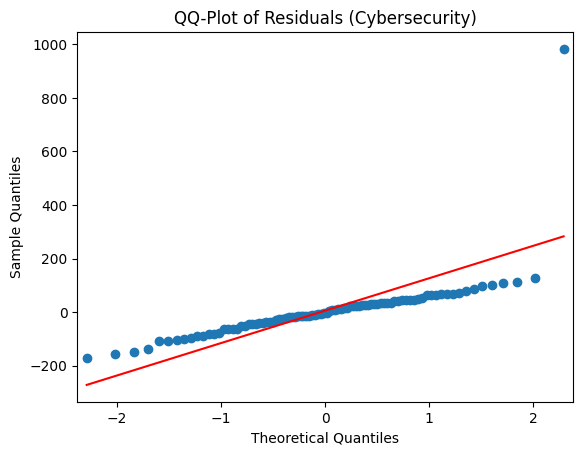

KS-Test p-value: 0.0009999999999998899





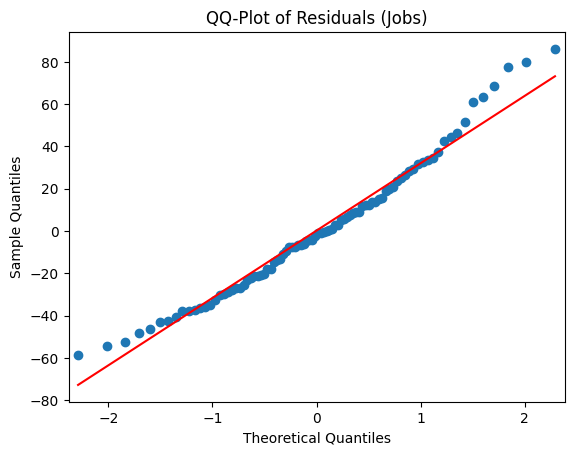

KS-Test p-value: 0.6975618478885381





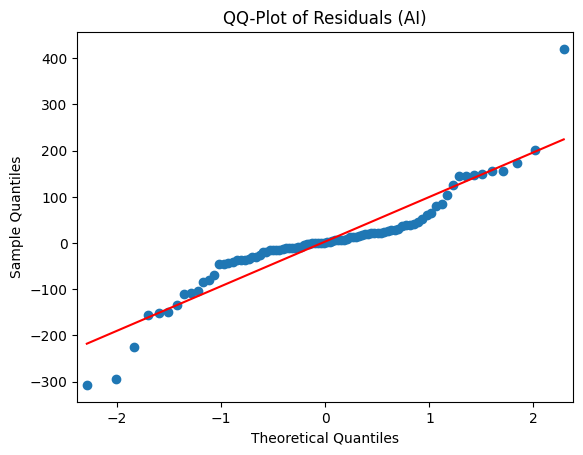

KS-Test p-value: 0.0009999999999998899





In [56]:
import statsmodels.api as sm

for arima_model in list_arima_models:
    residuals = arima_model.model.resid()
    sm.qqplot(residuals, line='s')
    ks_test = sm.stats.diagnostic.kstest_normal(residuals)
    
    plt.title(f'QQ-Plot of Residuals ({arima_model.label})')
    plt.show()
    print(f'KS-Test p-value: {ks_test[1]}\n\n\n')

### Forecasting

#### 0. Lade ARIMA-Modelle

In [57]:
from src.utils import load_pkl
from src.models.arima import ArimaModel

# load models
arima_models_names = ['arima_model_2_cybersecurity', 'arima_model_4_jobs', 'arima_model_5_ai']

list_arima_models = []
for model_name in arima_models_names:
    list_arima_models.append(load_pkl(f'../models/{model_name}.pkl'))

#### 1. Prognostiziere Trendverlauf 

Cybersecurity


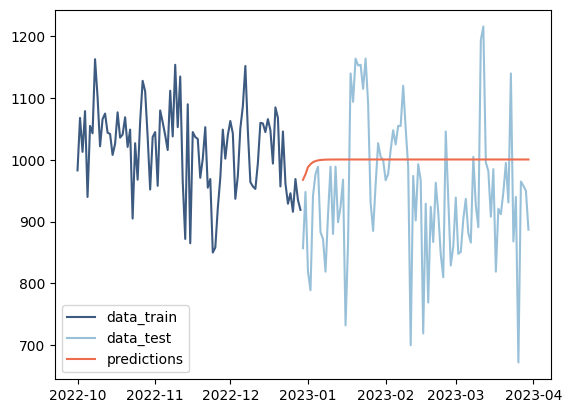

Average value of the dependent variable (AVG): 949.7473
Mean Absolute Error (MAE): 95.3311
Mean Absolute Percentage Error (MAPE): 0.1067
Root Mean Squared Error (RMSE): 119.2439




Jobs


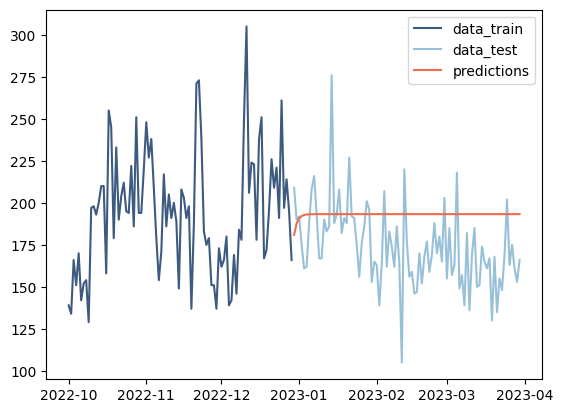

Average value of the dependent variable (AVG): 174.0
Mean Absolute Error (MAE): 25.5143
Mean Absolute Percentage Error (MAPE): 0.159
Root Mean Squared Error (RMSE): 30.9265




AI


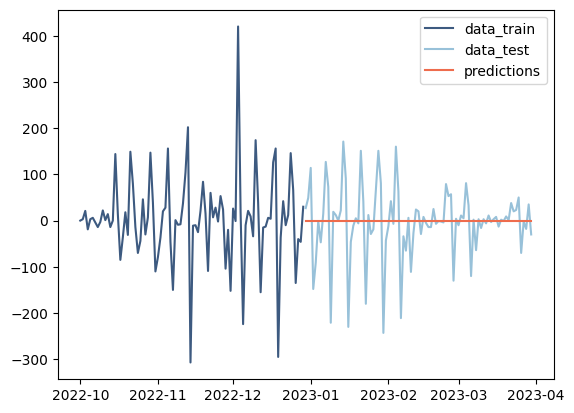

Average value of the dependent variable (AVG): -2.5824
Mean Absolute Error (MAE): 48.8681
Mean Absolute Percentage Error (MAPE): 0.989
Root Mean Squared Error (RMSE): 76.4394






In [58]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
    
for arima_model in list_arima_models:
    model = arima_model.model
    predictions = model.predict(n_periods=len(arima_model.data_test))
    
    # plot
    plt.plot(arima_model.data_train, label='data_train', color='#3d5a80')
    plt.plot(arima_model.data_test, label='data_test', color='#98c1d9')
    plt.plot(predictions, label='predictions', color='#ee6c4d')
    plt.legend()
    
    #
    avg = arima_model.data_test['count'].mean()
    mae = mean_absolute_error(arima_model.data_test, predictions)
    mape = mean_absolute_percentage_error(arima_model.data_test, predictions)
    rmse = mean_squared_error(arima_model.data_test, predictions, squared=False)
    
    #show
    print(arima_model.label)
    plt.show()
    print(f'Average value of the dependent variable (AVG): {round(avg, 4)}')
    print(f'Mean Absolute Error (MAE): {round(mae, 4)}')
    print(f'Mean Absolute Percentage Error (MAPE): {round(mape, 4)}')
    print(f'Root Mean Squared Error (RMSE): {round(rmse, 4)}')
    print('\n\n\n')

---

## Test: XGBoost <a name="xgboost"></a>

### Data Preparation

#### 1. Topic Assignment

In [2]:
%%script false
from src.models.time_series_forecasting import tweet_topic_assignment 
from src.utils import load_pkl
import pandas as pd

lda_model = load_pkl('../models/optimized_lda_model_17_01_07_9_0576.pkl')
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

df['topics'] = tweet_topic_assignment(lda_model, topic_minimum_probability=0.4)
df.to_feather('../data/modeling/topic_assigned_twitter_tweets.feather')

df.head(5)

Couldn't find program: 'false'


#### 2. Time Series erstellen

In [31]:
from src.models.time_series_forecasting import TimeSeries, process_to_timeseries
import pandas as pd

df_topics_assigned = pd.read_feather('../data/modeling/topic_assigned_twitter_tweets.feather')
df_topic_grouped_ts = process_to_timeseries(df_topics_assigned)

list_topic_time_series = []
for topic, df in df_topic_grouped_ts:
    df.drop('topic', axis=1, inplace=True)  
    tts = TimeSeries(id=topic + 1, data=df)
    list_topic_time_series.append(tts)

2023-06-27 15:14:17,954 - WARNING - 97495 tweets could not be assigned to a topic! -> Drop...


#### 3. Labeling

Hinweis: Alle nicht gelabelten Topics werden aussortiert und nicht weiter für die Modelle betrachtet

In [32]:
topic_labels = {
    9: 'Big Data & Data Science',
    8: 'AI',
    6: 'Cybersecurity',
    4: 'Mobile Gaming',
    2: 'Crypto',
    14: 'Elektromobilität',
    16: 'NFTs'
}

In [33]:
from src.utils import safe_as_pkl

# labeln & aussortieren
list_topic_time_series_selected = []
for tts in list_topic_time_series:
    if tts.id in topic_labels:
        tts.label = topic_labels[tts.id]
        list_topic_time_series_selected.append(tts)
        
safe_as_pkl(list_topic_time_series_selected, '../data/modeling/list_topic_time_series.pkl')

#### 4. Aufteilung in Trainings- und Testdaten

In [34]:
from src.models.time_series_forecasting import XGBoostModel
from src.utils import load_pkl

xgb_models = []
for tts in load_pkl('../data/modeling/list_topic_time_series.pkl'):
    xgb_model = XGBoostModel(tts.id, tts.label, tts.data)
    data_train, data_test = xgb_model.train_test_split(train_size=0.9)
    xgb_models.append(xgb_model)

#### 5. Vis

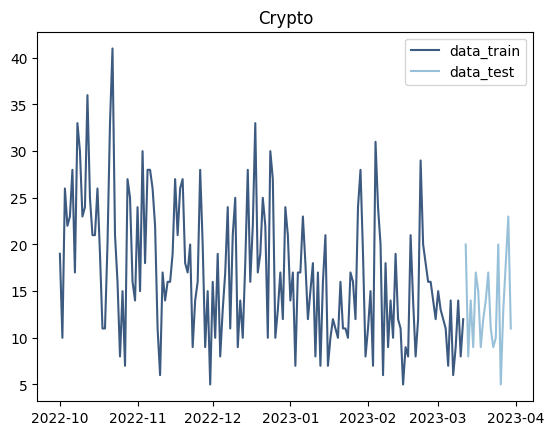

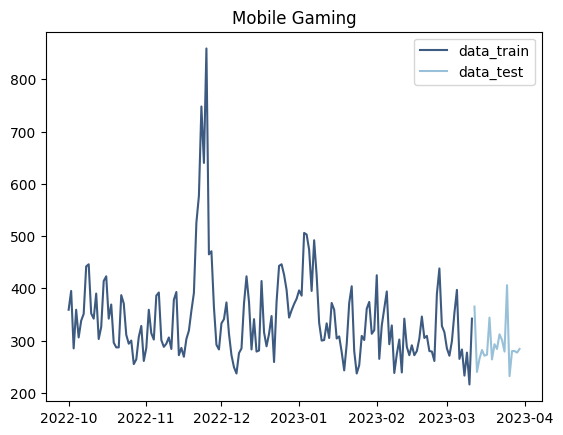

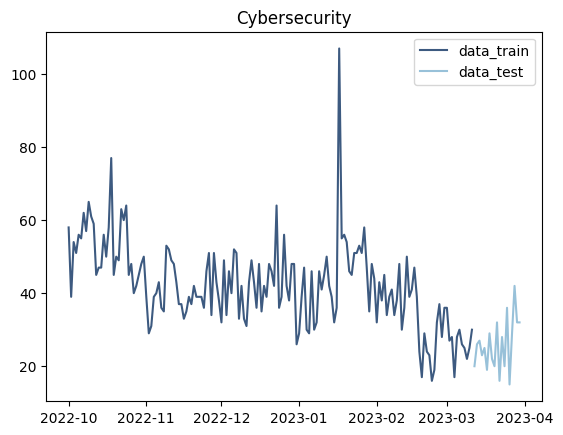

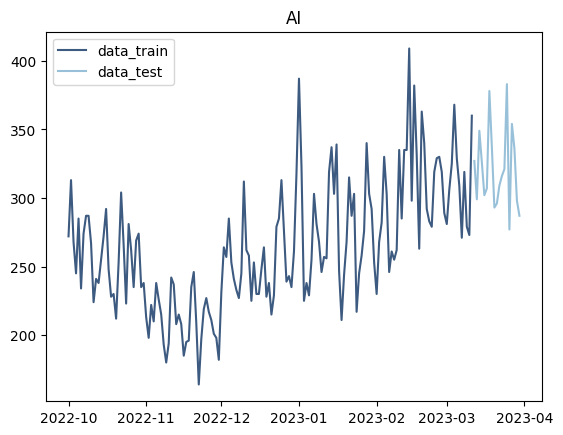

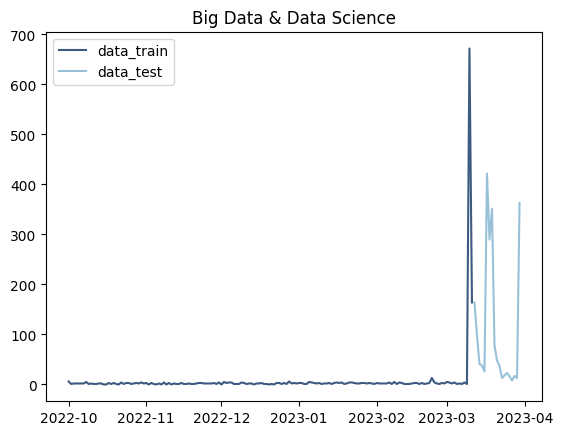

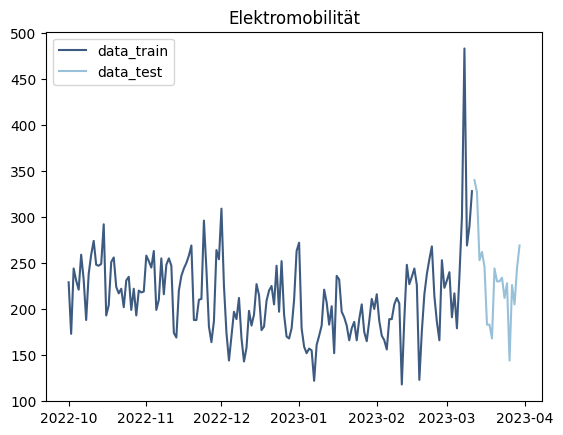

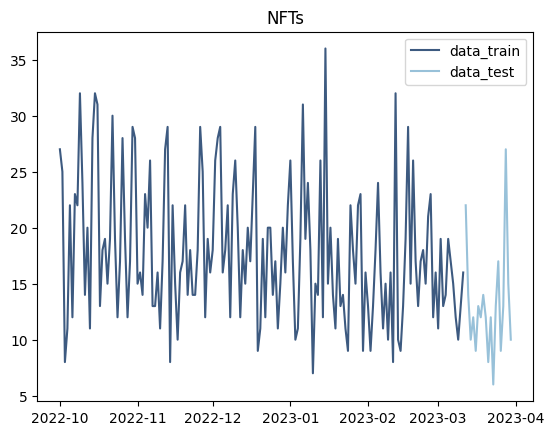

In [35]:
import matplotlib.pyplot as plt

for xgb_model in xgb_models:
    plt.plot(xgb_model.data_train, label='data_train', color='#3d5a80')
    plt.plot(xgb_model.data_test, label='data_test', color='#98c1d9')
    plt.legend()
    plt.title(xgb_model.label)
    plt.show()
    print('\n\n')

### Feature Engineering

Identifizieren Sie relevante Features und extrahieren Sie diese aus den vorhandenen Daten. Dies kann das Hinzufügen von Lag-Features, Aggregatfunktionen (z. B. Durchschnitt, Summe) über bestimmte Zeiträume oder das Hinzufügen von Zeitindikatoren (z. B. Monat, Tag der Woche) umfassen.

In [36]:
def create_features(data:pd.DataFrame):
    # zeitbasierten Features
    data['day'] = data.index.day
    data['week'] = data.index.isocalendar().week.astype(int)
    data['month'] = data.index.month
    data['weekday'] = data.index.weekday
    return data

for xgb_model in xgb_models:
    xgb_model.data_train_features = create_features(xgb_model.data_train.copy())
    xgb_model.data_test_features = create_features(xgb_model.data_test.copy())

### Modeling

In [37]:
import xgboost as xgb

FEATURES = ['day', 'week', 'month', 'weekday']
TARGET = 'count'

for xgb_model in xgb_models:
    # Trainingsdaten & Testdaten
    X_train = xgb_model.data_train_features[FEATURES]
    y_train = xgb_model.data_train_features[TARGET]
    X_test = xgb_model.data_test_features[FEATURES]
    y_test = xgb_model.data_test_features[TARGET]
    
    # Modell erstellen und trainieren
    reg = xgb.XGBRegressor(n_estimators=1000)
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    xgb_model.model = reg
    
    # Vorhersagen für Trainingsdaten
    xgb_model.data_test_features_predictions = xgb_model.data_test_features.assign(predictions=reg.predict(X_test))

### Evaluation

Kombiniere visuelle Auswertung mit statistischen Kennzahlen

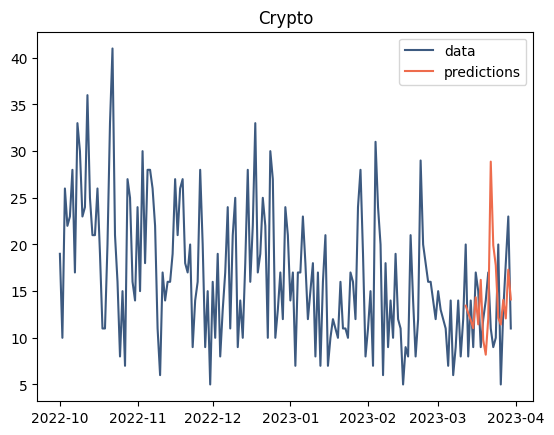

Average value of the dependent variable (AVG): 13.4211
MAE: 5.702931353920384
MAPE: 0.5053877665853576
RMSE: 6.836145853033707





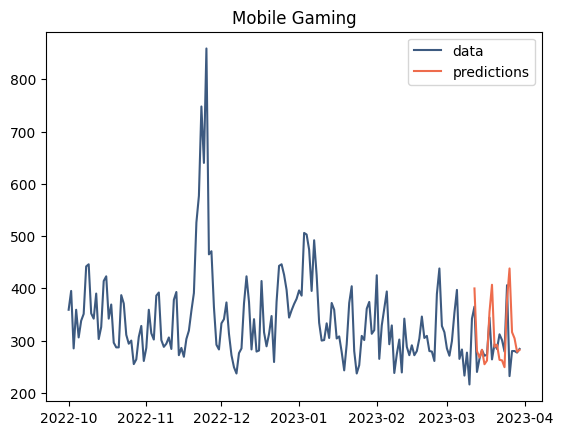

Average value of the dependent variable (AVG): 291.1579
MAE: 36.141855340254935
MAPE: 0.13517197999409247
RMSE: 62.27694474382751





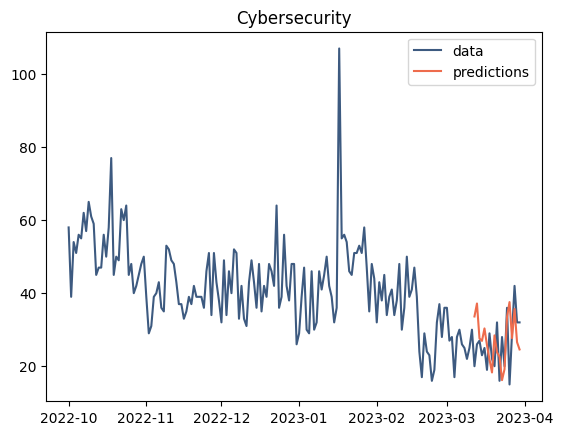

Average value of the dependent variable (AVG): 25.9474
MAE: 7.036190334119294
MAPE: 0.3164911019155406
RMSE: 8.670930598059192





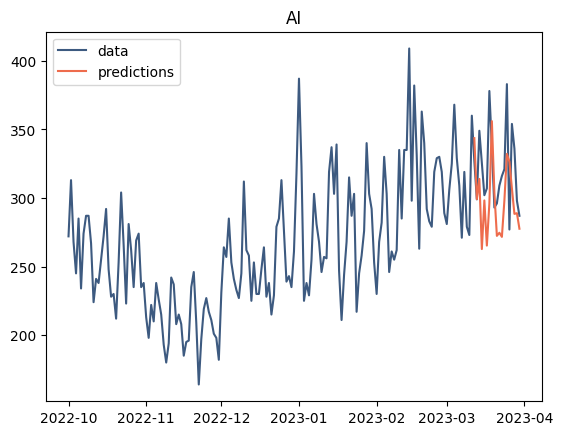

Average value of the dependent variable (AVG): 320.7895
MAE: 32.16636256167763
MAPE: 0.09771157693726543
RMSE: 38.65363803814071





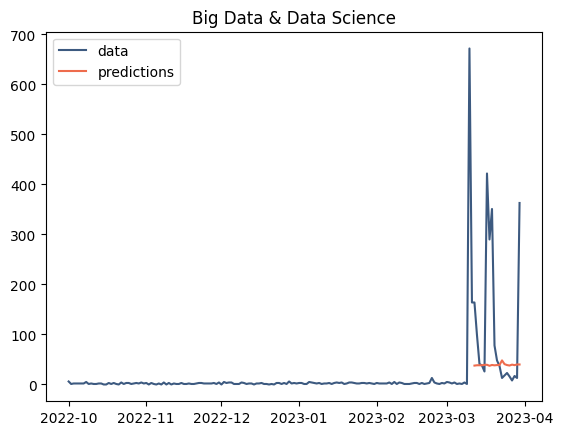

Average value of the dependent variable (AVG): 108.6842
MAE: 89.48197053608142
MAPE: 1.0322344554859602
RMSE: 151.83675935309506





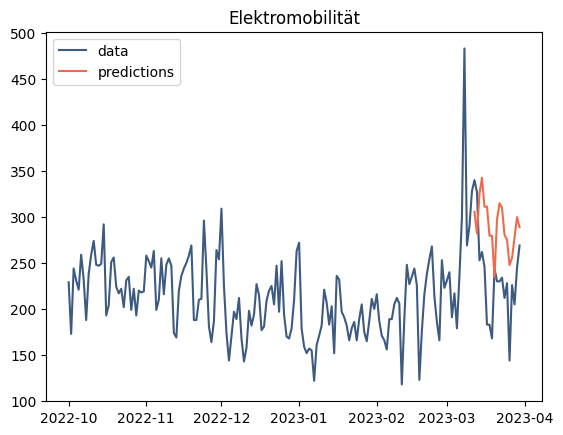

Average value of the dependent variable (AVG): 233.1053
MAE: 66.71044921875
MAPE: 0.31826403061631564
RMSE: 73.3532279194158





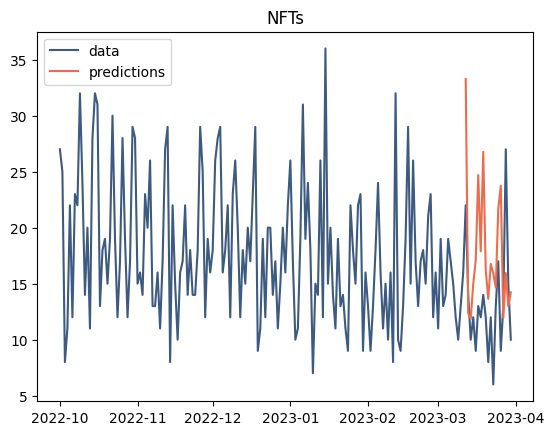

Average value of the dependent variable (AVG): 13.0526
MAE: 6.322563723513954
MAPE: 0.5503137949937423
RMSE: 7.6083082098838375





In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pandas as pd

for xgb_model in xgb_models:
    _ = pd.concat([xgb_model.data_train_features, xgb_model.data_test_features_predictions])
    _.drop(FEATURES, axis=1, inplace=True)
    plt.plot(_['count'], label='data', color='#3d5a80')
    plt.plot(_['predictions'], label='predictions', color='#ee6c4d')
    plt.legend()
    plt.title(xgb_model.label)
    plt.show()
    
    avg = xgb_model.data_test_features[TARGET].mean()
    mae = mean_absolute_error(xgb_model.data_test_features[TARGET], xgb_model.data_test_features_predictions['predictions'])
    mape = mean_absolute_percentage_error(xgb_model.data_test_features[TARGET], xgb_model.data_test_features_predictions['predictions'])
    rmse = mean_squared_error(xgb_model.data_test_features[TARGET], xgb_model.data_test_features_predictions['predictions'], squared=False)
    
    print(f'Average value of the dependent variable (AVG): {round(avg, 4)}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')
    
    print('\n\n')

---